___

# Machine Learning in Geosciences ] 
Department of Applied Geoinformatics and Carthography, Charles University

Lukas Brodsky lukas.brodsky@natur.cuni.cz


## Fundamental Algorithms: trees-based  


**Purpose**: plot the decision surfaces of forests of randomized trees trained on pairs of features of the iris dataset.

The plot compares the decision surfaces learned by a decision tree classifier, by a random forest classifier and by an extra-trees classifier.

The classifiers are built using the sepal width and the sepal length features only, on the second row using the petal length and sepal length only, and on the third row using the petal width and the petal length only.


**Tasks**: 

1/ vary the `max_depth` for the DecisionTreeClassifier, perhaps try max_depth=3 for the DecisionTreeClassifier

2/ vary `n_estimators` 


# Setup

In [4]:
# Common imports for reading, visualizing
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# utilities
from IPython.display import display
from sklearn import datasets
from sklearn import preprocessing
# from sklearn.datasets import load_iris 
# import pylab as pl
from sklearn import clone

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# todo later update
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

colors = "bry"

# Project dir
PROJECT_DIR = "./"
if os.path.isdir(PROJECT_DIR):
    print('Ok continue.')
else:
    print('Nok, set correct path to your project directory!')

Ok continue.


## Get data


In [5]:
iris = datasets.load_iris()


## Use tree models model 

In [7]:
# Parameters
n_classes = 3
n_estimators = 30
plot_colors = "bry"
plot_step = 0.02
# pl.set_cmap(pl.cm.Paired)

In [8]:
models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators)
]


In [9]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] 

In [ ]:
# (features[pair[0]], features[pair[1]])

Model: DecisionTreeClassifier(), pair: ('sepal_length', 'sepal_width'), score: 0.93
Model: RandomForestClassifier(n_estimators=30), pair: ('sepal_length', 'sepal_width'), score: 0.93
Model: ExtraTreesClassifier(n_estimators=30), pair: ('sepal_length', 'sepal_width'), score: 0.93
Model: DecisionTreeClassifier(), pair: ('sepal_length', 'petal_length'), score: 0.99
Model: RandomForestClassifier(n_estimators=30), pair: ('sepal_length', 'petal_length'), score: 0.99
Model: ExtraTreesClassifier(n_estimators=30), pair: ('sepal_length', 'petal_length'), score: 0.99
Model: DecisionTreeClassifier(), pair: ('petal_length', 'petal_width'), score: 0.99
Model: RandomForestClassifier(n_estimators=30), pair: ('petal_length', 'petal_width'), score: 0.99
Model: ExtraTreesClassifier(n_estimators=30), pair: ('petal_length', 'petal_width'), score: 0.99


Text(0.5, 0.98, 'Decision surfaces of a decision tree, of a random forest, and of an extra-trees classifier')

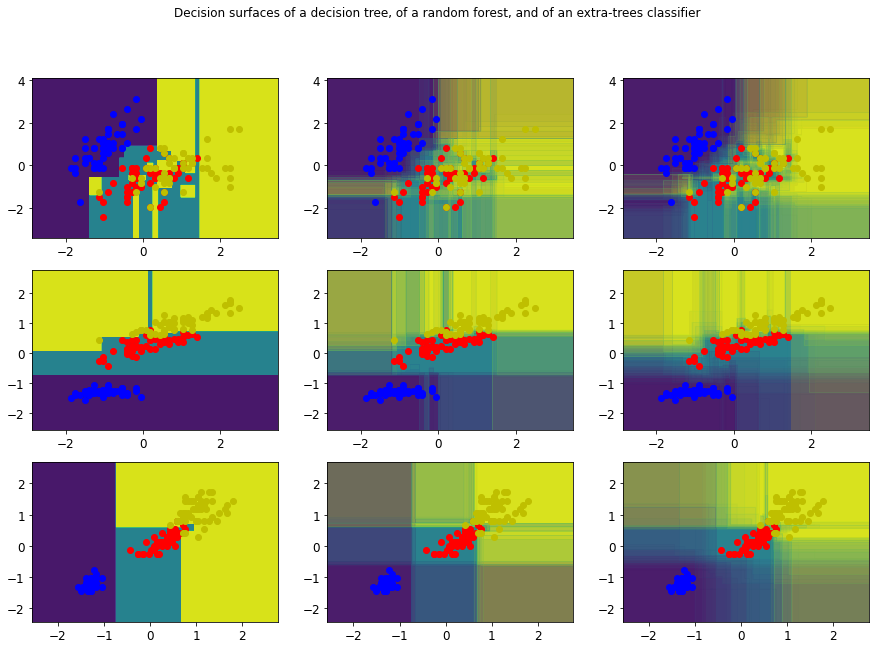

In [10]:
# plot decision boundary of Decision tree classifier, Random forest and Extra trees

plot_idx = 1

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in (DecisionTreeClassifier(),
                  RandomForestClassifier(n_estimators=n_estimators),
                  ExtraTreesClassifier(n_estimators=n_estimators)):
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(13)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        clf = clone(model)
        clf = model.fit(X, y)
        
        scores = model.score(X, y)
        print('Model: {}, pair: {}, score: {}'.format(model, (features[pair[0]], features[pair[1]]), 
                                                      round(scores, 2)))  

        # Plot the decision boundary
        # print(plot_idx)
        plt.subplot(3, 3, plot_idx) 

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z)
        else:
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=0.1)

        # plt.axis("tight")

        # Plot the training points
        for i, c in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i])

        plt.axis("tight")

        plot_idx += 1

plt.suptitle("Decision surfaces of a decision tree, of a random forest, and of "
             "an extra-trees classifier")
